In [1]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
color = sns.color_palette()
import matplotlib.mlab as mlab
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [10]:
import os
#os.chdir('/Users/asudomoeva/Desktop/Capstone')

## Loading our final datasets

In [11]:
final_state_data = pd.read_csv('final_data_states.csv')
#final_industry_data = pd.read_csv('Data and Preprocessing/Data/industry_allyear.csv')
#final_state_industry_data = pd.read_csv('Data and Preprocessing/Data/Codes.csv')

In [12]:
final_state_data = final_state_data.drop(['Unnamed: 0'], axis=1)

In [13]:
column_description = pd.DataFrame(final_state_data.dtypes)
column_description.head(15)

,0
GeoName,object
year,int64
Gross domestic product (GDP) by state,float64
Quantity indexes for real GDP by state,float64
Real GDP by state,float64
pce Clothing and footwear,float64
pce Food and beverages purchased for off-premises consumption,float64
pce Furnishings and durable household equipment,float64
pce Gasoline and other energy goods,float64
pce Motor vehicles and parts,float64


_______________

## Start by separating the features with the targets

In [14]:
contract_establish = final_state_data['contract_establish']
end_establish = final_state_data['end_establish']
expand_establish = final_state_data['expand_establish']
net_change = final_state_data['net_change']
open_establish = final_state_data['open_establish']
total_contract = final_state_data['total_contract']
total_expand = final_state_data['total_expand']

In [15]:
features = final_state_data.drop(['contract_establish', 'end_establish', 'expand_establish', 'net_change',
                                        'open_establish', 'total_contract', 'total_expand', 'GeoName',
                                 'year', 'state', 'Top Industry'], axis=1)

## Explore how the features are correlated to the target

In [16]:
correlation = final_state_data.select_dtypes(include=[np.number]).corr()

In [17]:
correlation_target = correlation[['contract_establish','end_establish', 'expand_establish', 'net_change', 'open_establish', 
             'total_contract', 'total_expand' ]]

In [18]:
corr_contract_establish = pd.DataFrame(correlation_target['contract_establish'].loc[
    correlation_target['contract_establish'] > 0.95].sort_values(ascending=False))
print(corr_contract_establish)

                                   contract_establish
contract_establish                           1.000000
total_contract                               0.998525
expand_establish                             0.991177
total_expand                                 0.990913
Wage and salary employment                   0.985066
Population (persons)                         0.981079
Total employment                             0.980067
Total employment (number of jobs)            0.980067
open_establish                               0.971668
end_establish                                0.970211
Real GDP by state                            0.964467


In [19]:
corr_end_establish = pd.DataFrame(correlation_target['end_establish'].loc[
    correlation_target['end_establish'] > 0.9].sort_values(ascending=False))
print(corr_end_establish)

                                   end_establish
end_establish                           1.000000
open_establish                          0.993701
total_contract                          0.981933
total_expand                            0.977108
contract_establish                      0.970211
expand_establish                        0.967299
Veterans' life insurance benefits       0.948621
Population (persons)                    0.935398
Wage and salary employment              0.934724
Total employment                        0.927428
Total employment (number of jobs)       0.927428
Monetary interest receipts              0.916698
Real GDP by state                       0.908059
Personal interest income                0.907338


In [20]:
corr_expand_establish = pd.DataFrame(correlation_target['expand_establish'].loc[
    correlation_target['expand_establish'] > 0.95].sort_values(ascending=False))
print(corr_expand_establish)

                                   expand_establish
expand_establish                           1.000000
total_expand                               0.998852
contract_establish                         0.991177
total_contract                             0.990981
Wage and salary employment                 0.985780
Population (persons)                       0.982500
Total employment                           0.981720
Total employment (number of jobs)          0.981720
open_establish                             0.976339
end_establish                              0.967299
Real GDP by state                          0.965467


In [21]:
corr_open_establish = pd.DataFrame(correlation_target['open_establish'].loc[
    correlation_target['open_establish'] > 0.9].sort_values(ascending=False))
print(corr_open_establish)

                                   open_establish
open_establish                           1.000000
end_establish                            0.993701
total_expand                             0.985577
total_contract                           0.981659
expand_establish                         0.976339
contract_establish                       0.971668
Veterans' life insurance benefits        0.951480
Wage and salary employment               0.944651
Population (persons)                     0.944609
Total employment                         0.938116
Total employment (number of jobs)        0.938116
Monetary interest receipts               0.919784
Real GDP by state                        0.917212
Personal interest income                 0.914346


In [22]:
corr_net_change = pd.DataFrame(correlation_target['net_change'].loc[
    correlation_target['net_change'] > 0.9].sort_values(ascending=False))
print(corr_net_change)

            net_change
net_change         1.0


In [23]:
corr_total_contract = pd.DataFrame(correlation_target['total_contract'].loc[
    correlation_target['total_contract'] > 0.95].sort_values(ascending=False))
print(corr_total_contract)

                                   total_contract
total_contract                           1.000000
contract_establish                       0.998525
total_expand                             0.992973
expand_establish                         0.990981
end_establish                            0.981933
open_establish                           0.981659
Wage and salary employment               0.978907
Population (persons)                     0.975945
Total employment                         0.973368
Total employment (number of jobs)        0.973368
Real GDP by state                        0.956842


In [24]:
corr_total_expand = pd.DataFrame(correlation_target['total_expand'].loc[
    correlation_target['total_expand'] > 0.95].sort_values(ascending=False))
print(corr_total_expand)

                                   total_expand
total_expand                           1.000000
expand_establish                       0.998852
total_contract                         0.992973
contract_establish                     0.990913
open_establish                         0.985577
Wage and salary employment             0.980704
Population (persons)                   0.978128
end_establish                          0.977108
Total employment                       0.976079
Total employment (number of jobs)      0.976079
Real GDP by state                      0.958729


## Correlations of our features

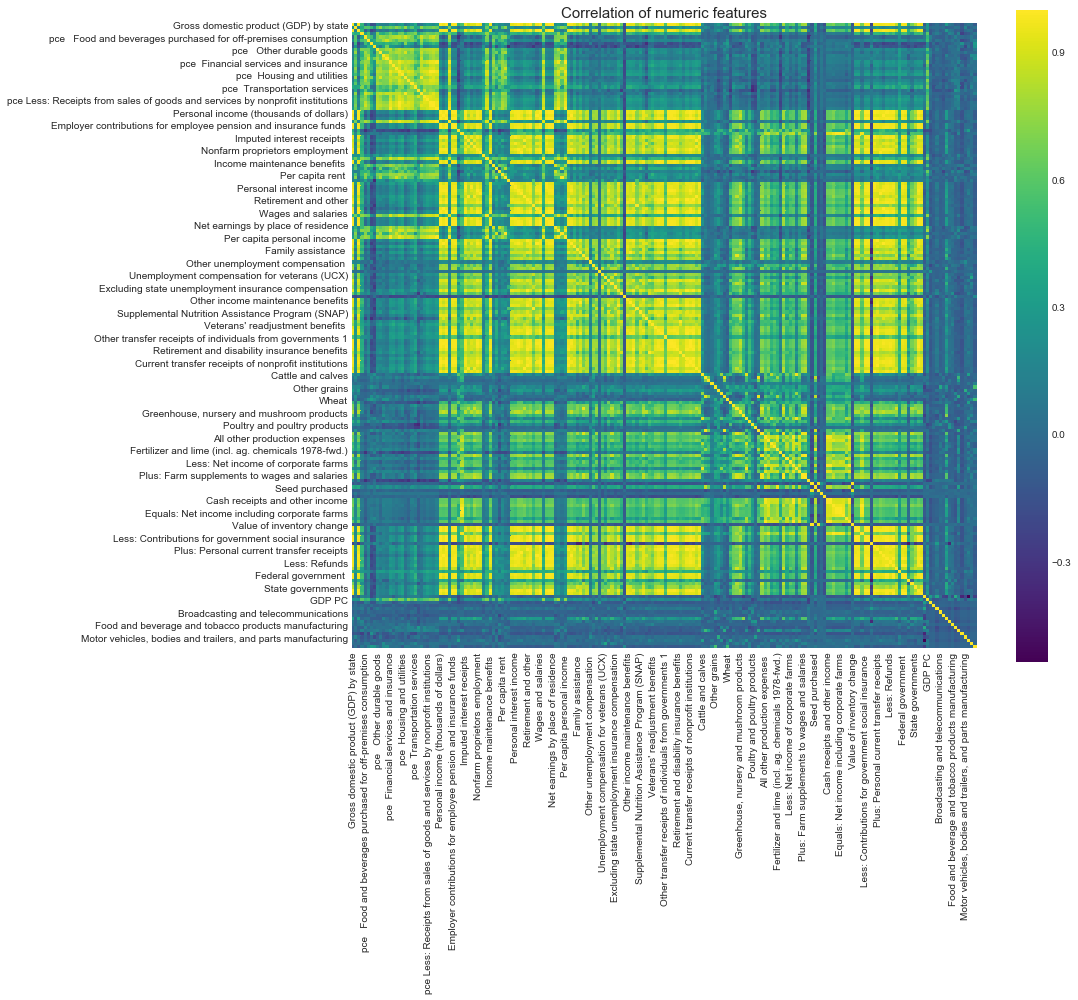

In [25]:
f, ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of numeric features', size = 15)
sns.heatmap(features.corr(), square=True, vmax=1, cmap='viridis')

________

# Running the regressions

## Working with expand establish as target

In [142]:
X = features.drop(['Wage and salary employment', 'Population (persons) ', 'Total employment',
                  'Total employment (number of jobs)', 'Real GDP by state'], axis=1)
y = expand_establish

In [143]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(X))
data_normalized.columns = X.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [232]:
# Create correlation matrix
corr_matrix = data_normalized.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)] # might need to play with this threshold

In [233]:
X_new = data_normalized.drop(to_drop, axis=1)
X_new.shape

(1000, 73)

In [234]:
# Create and fit selector
selector = SelectKBest(f_regression, k=20)
selector.fit(X_new, y)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [235]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest = X_new.iloc[:,idxs_selected]
X_kbest = sm.add_constant(X_kbest)

In [236]:
# creating a train/test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)

In [237]:
model = sm.OLS(y, X_kbest).fit()
predictions = model.predict(X_kbest) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       expand_establish   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     815.8
Date:                Wed, 21 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:12:23   Log-Likelihood:                -13874.
No. Observations:                1000   AIC:                         2.779e+04
Df Residuals:                     979   BIC:                         2.789e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                      1.322e+05   2.99e+04      4.424      0.000    7.35e+04    1.91e+05
Gross domestic product (GDP) by state                      7.721e+06   2.42e+05     31.898      0.000    7.25e+06     8.2e+06
pce   Clothing and footwear                               -2.059e+05   8.06e+04     -2.553      0.011   -3.64e+05   -4.76e+04
Farm proprietors employment                                9.487e+05   1.07e+05      8.884      0.000    7.39e+05    1.16e+06
Farm proprietors' income                                  -1.452e+06   2.14e+05     -6.790      0.000   -1.87e+06   -1.03e+06
Unemployment insurance compensation                       -1.535e+06   1.78e+05     -8.638      0.000   -1.88e+06   -1.19e+06
Railroad retirement and disability benefits                9.259e+05   8.81e+04     10.512      0.000    7.53e+05     1.1e+06
Workers' compensation                                      5.311e+05   1.08e+05      4.913      0.000    3.19e+05    7.43e+05
Military medical insurance benefits                       -1.029e+06   9.42e+04    -10.922      0.000   -1.21e+06   -8.44e+05
Other transfer receipts of individuals from governments 1 -9.325e+05    1.2e+05     -7.767      0.000   -1.17e+06   -6.97e+05
Cotton                                                     2.702e+05   1.35e+05      1.999      0.046    4983.646    5.35e+05
Dairy products                                             1.782e+05   1.26e+05      1.412      0.158   -6.95e+04    4.26e+05
Hay, silage, etc.                                         -7.987e+05   1.47e+05     -5.451      0.000   -1.09e+06   -5.11e+05
Other crops                                                5.454e+05    7.2e+04      7.573      0.000    4.04e+05    6.87e+05
All other production expenses                             -6.138e+05   1.72e+05     -3.563      0.000   -9.52e+05   -2.76e+05
Imputed and miscellaneous income received                  -8.55e+05   1.75e+05     -4.894      0.000    -1.2e+06   -5.12e+05
Less: Net income of corporate farms                        1.964e+06   1.95e+05     10.081      0.000    1.58e+06    2.35e+06
Other taxes                                               -4.679e+05    7.7e+04     -6.074      0.000   -6.19e+05   -3.17e+05
Local governments                                         -5.332e+05   1.18e+05     -4.514      0.000   -7.65e+05   -3.01e+05
State and local personal property taxes                    1.777e+06   1.44e+05     12.334      0.000    1.49e+06    2.06e+06
Computer and electronic products manufacturing             2.141e+05   5.81e+04      3.684      0.000       1e+05    3.28e+05
===========================================================

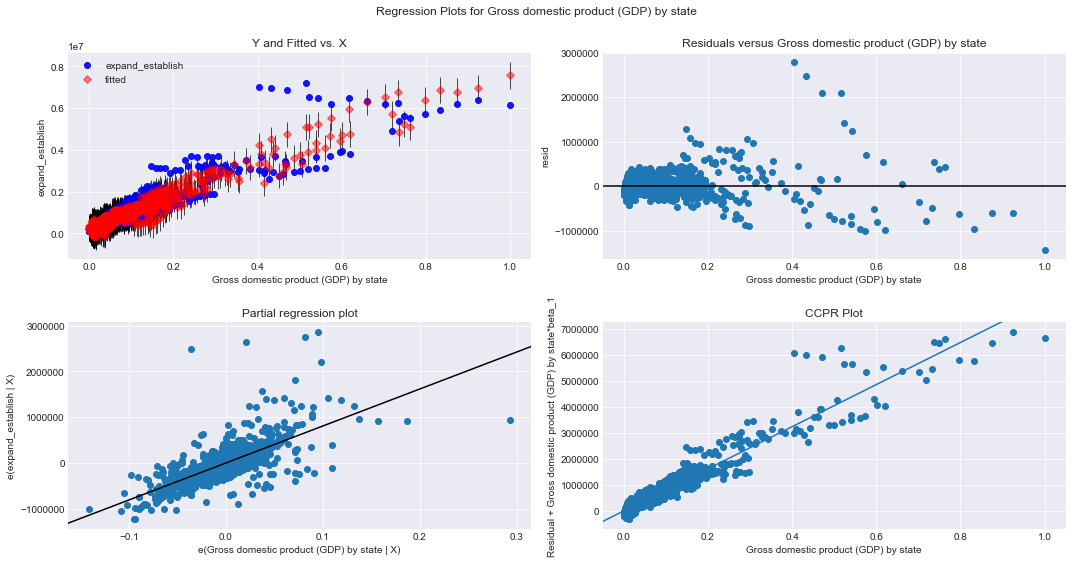

In [35]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(model, "Gross domestic product (GDP) by state", fig=fig)

## Applying log transormation onto our variables to show percentage changes

In [255]:
logged_data = np.log(X[['Gross domestic product (GDP) by state', 'Other taxes', 'Local governments', 
                        "Workers' compensation", 'Farm proprietors employment ', 'Per capita rent '
                       ]])
logged_data.columns = ['LOG Gross domestic product (GDP)', 'LOG Taxes', 'LOG Local Government Expenditure',
                      "LOG Average Employee Compensation", 'LOG Farm Employment',
                      'LOG Per Capita Rent']

In [256]:
X_logged = pd.concat([X_kbest, logged_data], axis=1, sort=False)

In [257]:
model = sm.OLS(y, X_logged).fit()
predictions = model.predict(X_logged) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       expand_establish   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     710.1
Date:                Wed, 21 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:20:28   Log-Likelihood:                -13813.
No. Observations:                1000   AIC:                         2.768e+04
Df Residuals:                     973   BIC:                         2.781e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                      -1.01e+06    2.5e+05     -4.035      0.000    -1.5e+06   -5.19e+05
Gross domestic product (GDP) by state                      7.219e+06   2.47e+05     29.218      0.000    6.73e+06     7.7e+06
pce   Clothing and footwear                               -4.282e+05   9.67e+04     -4.427      0.000   -6.18e+05   -2.38e+05
Farm proprietors employment                                 5.76e+05    1.3e+05      4.445      0.000    3.22e+05     8.3e+05
Farm proprietors' income                                  -1.332e+06   2.03e+05     -6.550      0.000   -1.73e+06   -9.33e+05
Unemployment insurance compensation                       -1.637e+06    1.7e+05     -9.647      0.000   -1.97e+06    -1.3e+06
Railroad retirement and disability benefits                  5.9e+05   9.31e+04      6.337      0.000    4.07e+05    7.73e+05
Workers' compensation                                      3.204e+05   1.27e+05      2.524      0.012    7.13e+04    5.69e+05
Military medical insurance benefits                       -1.042e+06   9.34e+04    -11.162      0.000   -1.23e+06   -8.59e+05
Other transfer receipts of individuals from governments 1 -8.282e+05   1.15e+05     -7.233      0.000   -1.05e+06   -6.04e+05
Cotton                                                     4.382e+05   1.38e+05      3.184      0.001    1.68e+05    7.08e+05
Dairy products                                             2.155e+05   1.25e+05      1.727      0.084   -2.94e+04     4.6e+05
Hay, silage, etc.                                         -5.741e+05   1.49e+05     -3.855      0.000   -8.66e+05   -2.82e+05
Other crops                                                5.058e+05   7.12e+04      7.100      0.000    3.66e+05    6.46e+05
All other production expenses                             -2.104e+05   1.76e+05     -1.195      0.232   -5.56e+05    1.35e+05
Imputed and miscellaneous income received                 -7.444e+05   1.68e+05     -4.439      0.000   -1.07e+06   -4.15e+05
Less: Net income of corporate farms                        1.794e+06   1.91e+05      9.400      0.000    1.42e+06    2.17e+06
Other taxes                                               -5.224e+05   7.62e+04     -6.856      0.000   -6.72e+05   -3.73e+05
Local governments                                         -5.837e+05   1.51e+05     -3.871      0.000    -8.8e+05   -2.88e+05
State and local personal property taxes                    1.514e+06   1.42e+05     10.657      0.000    1.24e+06    1.79e+06
Computer and electronic products manufacturing             2.056e+05   5.55e+04      3.703      0.000    9.66e+04    3.14e+05
LOG Gross domestic product (GDP)                           

In [260]:
# Here's the total effect of a 1% parameter change on the target
coefficients = pd.DataFrame(model.params/100, columns=['Expand Establish Effect (1% change in feature)'])
log_coefficients = coefficients.iloc[-6:,:]

In [335]:
log_coefficients.to_csv('expand_establish_perc_effect.csv')

### Using Decision Tree Regressor

In [480]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
treeReg = DecisionTreeRegressor(random_state=0, max_depth=5)
modelRegTree = treeReg.fit(X_train, y_train)
print('Train Score:', treeReg.score(X_train, y_train))
print('Test Score:', treeReg.score(X_test, y_test))

Train Score: 0.9828711191671478
Test Score: 0.9651607208021183


In [488]:
features_list = X_kbest.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(5)

,Feature,importance
1,Gross domestic product (GDP) by state,0.740786
20,Computer and electronic products manufacturing,0.162026
8,Railroad retirement and disability benefits,0.046449
5,Farm proprietors employment,0.012640
12,Sheep and other livestock,0.012576


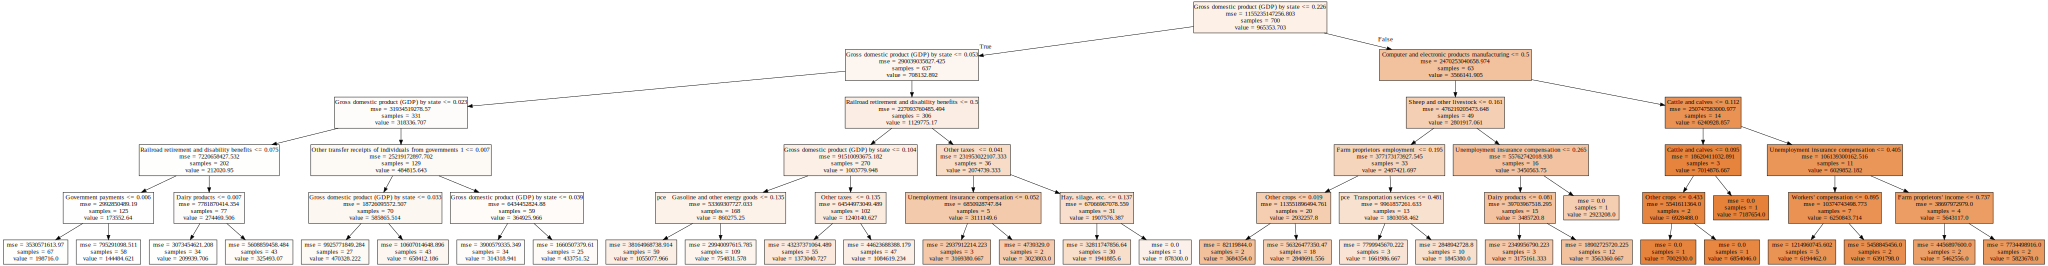

In [512]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(treeReg, out_file=None
   , feature_names=X_kbest.columns
   , filled = True))
display(SVG(graph.pipe(format='svg')))

## Using XGBoost Regressor

In [521]:
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
shap.initjs()

In [513]:
xgb = XGBRegressor()
regressor = xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.9857405719300876

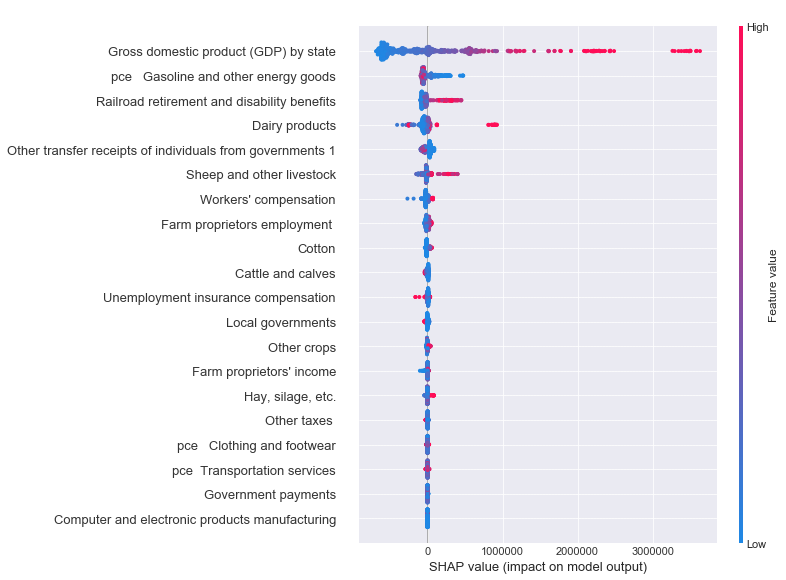

In [527]:
import shap
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

## Working with Open Establish

In [342]:
X = features.drop(["Veterans' life insurance benefits", 'Wage and salary employment', 'Population (persons) ',
                   'Total employment', 'Personal interest income',
                  'Total employment (number of jobs)', 'Monetary interest receipts', 'Real GDP by state'], axis=1)
y = open_establish

In [343]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(X))
data_normalized.columns = X.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [344]:
# Create correlation matrix
corr_matrix = data_normalized.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [345]:
X_new = data_normalized.drop(to_drop, axis=1)
X_new.shape

(1000, 64)

In [356]:
# Create and fit selector
selector = SelectKBest(f_regression, k=30)
selector.fit(X_new, y)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [357]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest = X_new.iloc[:,idxs_selected]
X_kbest = sm.add_constant(X_kbest)

In [348]:
# creating a train/test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)

In [358]:
model = sm.OLS(y, X_kbest).fit()
predictions = model.predict(X_kbest) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         open_establish   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     202.4
Date:                Wed, 21 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:32:21   Log-Likelihood:                -13057.
No. Observations:                1000   AIC:                         2.618e+04
Df Residuals:                     969   BIC:                         2.633e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     1.239e+05   3.55e+04      3.489      0.001    5.42e+04    1.94e+05
Gross domestic product (GDP) by state                                                     2.443e+06   1.08e+05     22.624      0.000    2.23e+06    2.65e+06
pce   Clothing and footwear                                                              -2.026e+05   5.03e+04     -4.032      0.000   -3.01e+05   -1.04e+05
pce   Food and beverages purchased for off-premises consumption                          -1.112e+05   4.34e+04     -2.561      0.011   -1.96e+05    -2.6e+04
pce   Gasoline and other energy goods                                                    -3.261e+04   4.45e+04     -0.732      0.464    -1.2e+05    5.48e+04
pce   Motor vehicles and parts                                                           -4.928e+04   4.09e+04     -1.204      0.229    -1.3e+05     3.1e+04
pce  Transportation services                                                              1.111e+05    5.2e+04      2.138      0.033    9103.631    2.13e+05
pce Final consumption expenditures of nonprofit institutions serving households (NPISHs) -2.056e+05   4.31e+04     -4.776      0.000    -2.9e+05   -1.21e+05
Farm proprietors employment                                                                2.76e+04   5.42e+04      0.509      0.611   -7.88e+04    1.34e+05
Farm proprietors' income                                                                 -1.275e+05   7.12e+04     -1.791      0.074   -2.67e+05    1.22e+04
Average nonfarm proprietors' income                                                        2.55e+04   3.78e+04      0.675      0.500   -4.86e+04    9.96e+04
Unemployment insurance compensation                                                      -1.112e+05   7.93e+04     -1.401      0.162   -2.67e+05    4.45e+04
Railroad retirement and disability benefits                                               8.351e+04    3.9e+04      2.139      0.033    6900.058     1.6e+05
Workers' compensation                                                                     1.141e+05   4.88e+04      2.336      0.020    1.82e+04     2.1e+05
Other assistance to veterans 1                                                           -3.365e+04   1.24e+04     -2.710      0.007    -5.8e+04   -9286.132
Other transfer receipts of individuals from governments 1                                -4.692e+05   5.19e+04     -9.033      0.000   -5.71e+05   -3.67e+05
Cattle and calves                                                                        -1.884e+05 

In [359]:
logged_data = np.log(X[['Gross domestic product (GDP) by state', 'Other taxes', 'Local governments', 
                        "Workers' compensation", 'Farm proprietors employment ', 'Per capita rent '
                       ]])
logged_data.columns = ['LOG Gross domestic product (GDP)', 'LOG Taxes', 'LOG Local Government Expenditure',
                      "LOG Average Employee Compensation", 'LOG Farm Employment',
                      'LOG Per Capita Rent']
X_logged = pd.concat([X_kbest, logged_data], axis=1, sort=False)

In [361]:
model = sm.OLS(y, X_logged).fit()
predictions = model.predict(X_logged) # make the predictions by the model

# Print out the coefficients
# Here's the total effect of a 1% parameter change on the target
coefficients = pd.DataFrame(model.params/100, columns=['Open Establish Effect (1% change in feature)'])
log_coefficients = coefficients.iloc[-6:,:]
log_coefficients

,Open Establish Effect (1% change in feature)
LOG Gross domestic product (GDP),725.675657
LOG Taxes,-90.005556
LOG Local Government Expenditure,68.428191
LOG Average Employee Compensation,-175.592643
LOG Farm Employment,-229.146857
LOG Per Capita Rent,-415.078561


In [363]:
log_coefficients.to_csv('open_establish_perc_effect.csv')

In [594]:
from sklearn.tree import DecisionTreeRegressor
treeReg = DecisionTreeRegressor(random_state=0, max_depth=5)
modelRegTree = treeReg.fit(X_train, y_train)
print('Train Score:', treeReg.score(X_train, y_train))
print('Test Score:', treeReg.score(X_test, y_test))

Train Score: 0.9852800659973643
Test Score: 0.9171079982703604


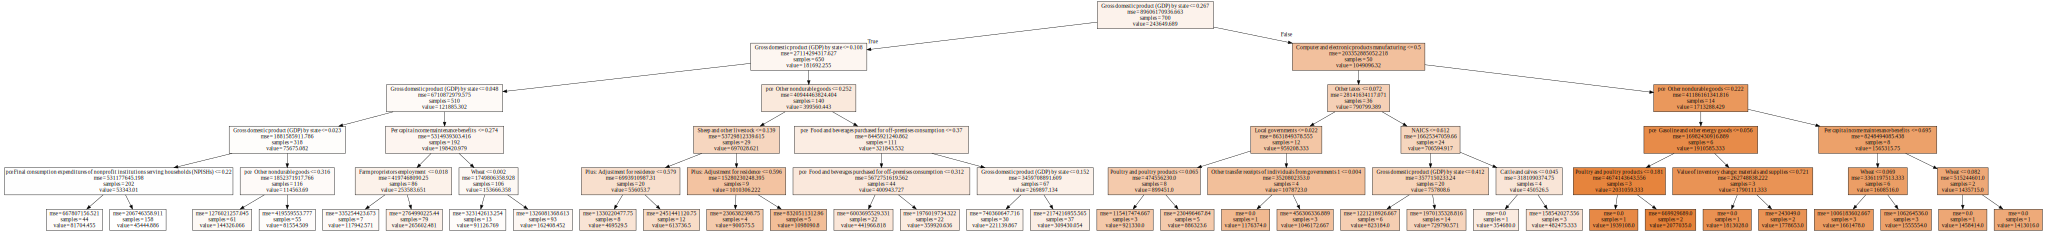

In [539]:
graph = Source(tree.export_graphviz(treeReg, out_file=None
   , feature_names=X_kbest.columns
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [540]:
features_list = X_kbest.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(5)

,Feature,importance
1,Gross domestic product (GDP) by state,0.738622
40,Computer and electronic products manufacturing,0.138799
7,pce Other nondurable goods,0.060828
23,Sheep and other livestock,0.020724
3,pce Food and beverages purchased for off-pre...,0.008578


In [541]:
xgb = XGBRegressor()
regressor = xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.9745685999452529

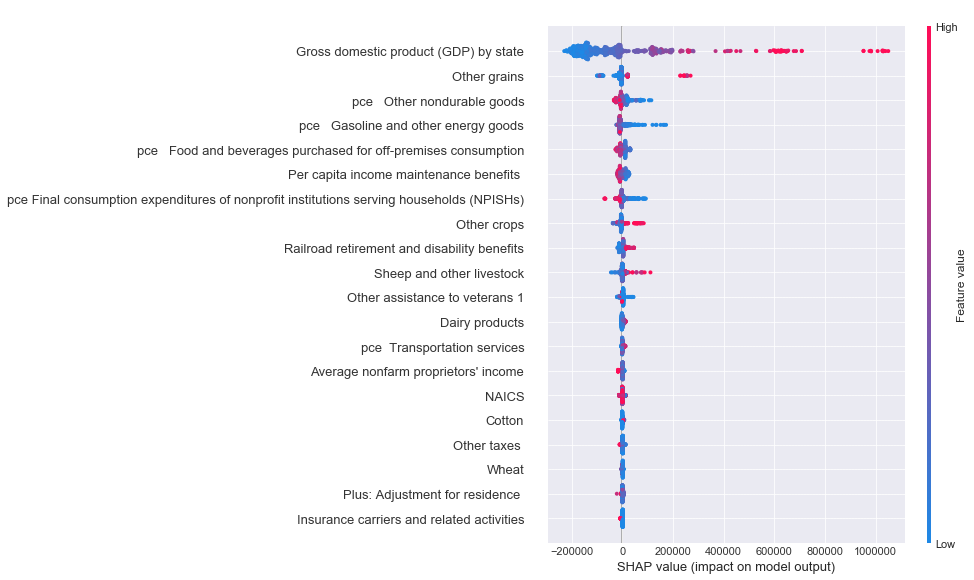

In [542]:
import shap
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

## Working with End Establish

In [389]:
X = features.drop(["Veterans' life insurance benefits", 'Wage and salary employment', 'Population (persons) ',
                   'Total employment', 'Personal interest income',
                  'Total employment (number of jobs)', 'Monetary interest receipts', 'Real GDP by state'], axis=1)
y = end_establish

In [390]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(X))
data_normalized.columns = X.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [391]:
# Create correlation matrix
corr_matrix = data_normalized.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [392]:
X_new = data_normalized.drop(to_drop, axis=1)
X_new.shape

(1000, 64)

In [393]:
# Create and fit selector
selector = SelectKBest(f_regression, k=45)
selector.fit(X_new, y)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [394]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest = X_new.iloc[:,idxs_selected]
X_kbest = sm.add_constant(X_kbest)

In [395]:
# creating a train/test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)

In [396]:
model = sm.OLS(y, X_kbest).fit()
predictions = model.predict(X_kbest) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          end_establish   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     133.1
Date:                Wed, 21 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:41:31   Log-Likelihood:                -13025.
No. Observations:                1000   AIC:                         2.614e+04
Df Residuals:                     954   BIC:                         2.637e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                      7.71e+04   6.63e+04      1.162      0.245   -5.31e+04    2.07e+05
Gross domestic product (GDP) by state                                                     2.227e+06   1.27e+05     17.530      0.000    1.98e+06    2.48e+06
pce   Clothing and footwear                                                              -1.721e+05   5.64e+04     -3.050      0.002   -2.83e+05   -6.14e+04
pce   Food and beverages purchased for off-premises consumption                           1.398e+04   5.87e+04      0.238      0.812   -1.01e+05    1.29e+05
pce   Gasoline and other energy goods                                                     6537.8274   5.02e+04      0.130      0.896   -9.19e+04    1.05e+05
pce   Motor vehicles and parts                                                           -2.173e+05   4.74e+04     -4.583      0.000    -3.1e+05   -1.24e+05
pce   Other nondurable goods                                                             -6.456e+04   5.35e+04     -1.207      0.228    -1.7e+05    4.04e+04
pce  Transportation services                                                              2.794e+04   7.17e+04      0.390      0.697   -1.13e+05    1.69e+05
pce Final consumption expenditures of nonprofit institutions serving households (NPISHs) -1.495e+05   5.66e+04     -2.641      0.008   -2.61e+05   -3.84e+04
Farm proprietors employment                                                               4.077e+04   5.78e+04      0.706      0.481   -7.26e+04    1.54e+05
Farm proprietors' income                                                                 -1.407e+05    7.4e+04     -1.901      0.058   -2.86e+05    4577.742
Average nonfarm proprietors' income                                                       9.061e+04   4.06e+04      2.232      0.026    1.09e+04     1.7e+05
Per capita income maintenance benefits                                                   -1.146e+05   4.31e+04     -2.659      0.008   -1.99e+05      -3e+04
Per capita interest                                                                       7.884e+04   4.77e+04      1.654      0.098   -1.47e+04    1.72e+05
Unemployment insurance compensation                                                      -6.449e+04   8.01e+04     -0.805      0.421   -2.22e+05    9.27e+04
Other unemployment compensation                                                          -4.239e+04   2.87e+04     -1.477      0.140   -9.87e+04    1.39e+04
Railroad retirement and disability benefits                                               1.377e+05 

In [397]:
logged_data = np.log(X[['Gross domestic product (GDP) by state', 'Other taxes', 'Local governments', 
                        "Workers' compensation", 'Farm proprietors employment ', 'Per capita rent '
                       ]])
logged_data.columns = ['LOG Gross domestic product (GDP)', 'LOG Taxes', 'LOG Local Government Expenditure',
                      "LOG Average Employee Compensation", 'LOG Farm Employment',
                      'LOG Per Capita Rent']
X_logged = pd.concat([X_kbest, logged_data], axis=1, sort=False)

In [398]:
model = sm.OLS(y, X_logged).fit()
predictions = model.predict(X_logged) # make the predictions by the model

# Print out the coefficients
# Here's the total effect of a 1% parameter change on the target
coefficients = pd.DataFrame(model.params/100, columns=['End Establish Effect (1% change in feature)'])
log_coefficients = coefficients.iloc[-6:,:]
log_coefficients

,End Establish Effect (1% change in feature)
LOG Gross domestic product (GDP),1236.946981
LOG Taxes,-57.734349
LOG Local Government Expenditure,211.542773
LOG Average Employee Compensation,-210.943362
LOG Farm Employment,-71.068236
LOG Per Capita Rent,539.227533


In [399]:
log_coefficients.to_csv('end_establish_perc_effect.csv')

In [551]:
from sklearn.tree import DecisionTreeRegressor
treeReg = DecisionTreeRegressor(random_state=0, max_depth=10)
modelRegTree = treeReg.fit(X_train, y_train)
print('Train Score:', treeReg.score(X_train, y_train))
print('Test Score:', treeReg.score(X_test, y_test))

Train Score: 0.9993722975369208
Test Score: 0.9100825783839976


In [552]:
features_list = X_kbest.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(5)

,Feature,importance
1,Gross domestic product (GDP) by state,0.714396
27,"Hay, silage, etc.",0.143980
6,pce Other nondurable goods,0.048775
22,Sheep and other livestock,0.024646
34,Other taxes,0.014765


In [553]:
xgb = XGBRegressor()
regressor = xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.9747357866280599

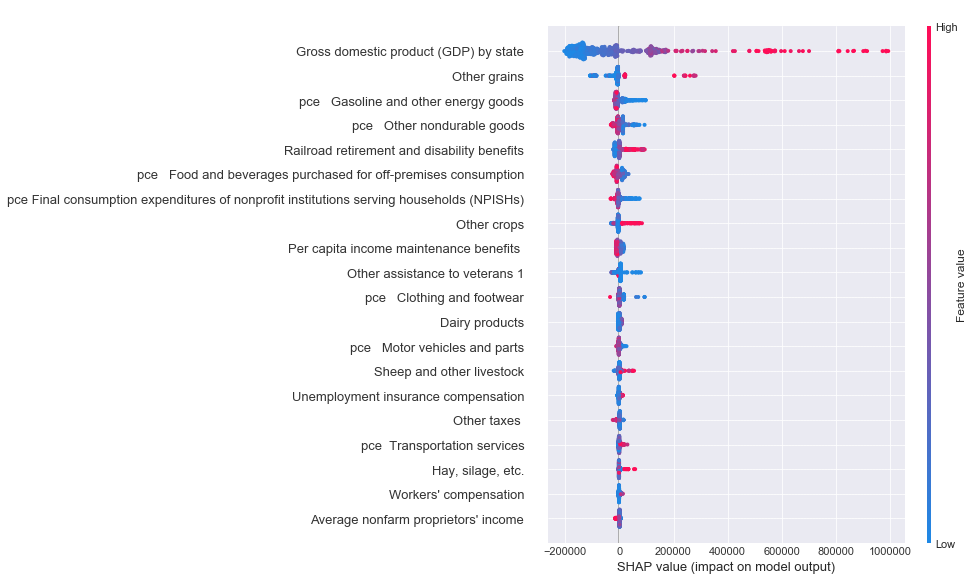

In [554]:
import shap
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

## Working with Net Change

In [377]:
X = features
y = net_change

In [378]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(X))
data_normalized.columns = X.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [379]:
# Create correlation matrix
corr_matrix = data_normalized.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [380]:
X_new = data_normalized.drop(to_drop, axis=1)
X_new.shape

(1000, 64)

In [381]:
# Create and fit selector
selector = SelectKBest(f_regression, k=45)
selector.fit(X_new, y)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [382]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest = X_new.iloc[:,idxs_selected]
X_kbest = sm.add_constant(X_kbest)

In [561]:
# creating a train/test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)

In [384]:
model = sm.OLS(y, X_kbest).fit()
predictions = model.predict(X_kbest) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             net_change   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     11.97
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           1.54e-65
Time:                        17:38:55   Log-Likelihood:                -13237.
No. Observations:                1000   AIC:                         2.657e+04
Df Residuals:                     954   BIC:                         2.679e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    -1.744e+04   1.04e+05     -0.167      0.867   -2.22e+05    1.87e+05
Gross domestic product (GDP) by state                                                    -2.957e+05    1.4e+05     -2.109      0.035   -5.71e+05   -2.05e+04
pce   Clothing and footwear                                                               3.238e+05   9.03e+04      3.586      0.000    1.47e+05    5.01e+05
pce   Food and beverages purchased for off-premises consumption                           1.178e+05    6.4e+04      1.841      0.066   -7754.207    2.43e+05
pce   Furnishings and durable household equipment                                        -5.382e+04    6.4e+04     -0.841      0.400   -1.79e+05    7.17e+04
pce   Gasoline and other energy goods                                                    -1.912e+05   6.55e+04     -2.918      0.004    -3.2e+05   -6.26e+04
pce   Motor vehicles and parts                                                             5.68e+04   6.39e+04      0.889      0.374   -6.87e+04    1.82e+05
pce   Other durable goods                                                                -1.868e+05   7.51e+04     -2.486      0.013   -3.34e+05   -3.94e+04
pce  Transportation services                                                              1.762e+05   8.27e+04      2.131      0.033    1.39e+04    3.38e+05
pce Final consumption expenditures of nonprofit institutions serving households (NPISHs) -2.706e+05   6.56e+04     -4.128      0.000   -3.99e+05   -1.42e+05
Farm proprietors employment                                                               6.347e+04   7.09e+04      0.895      0.371   -7.56e+04    2.03e+05
Farm proprietors' income                                                                  8.621e+05   9.54e+04      9.033      0.000    6.75e+05    1.05e+06
Average nonfarm proprietors' income                                                       -8.39e+04   4.84e+04     -1.734      0.083   -1.79e+05     1.1e+04
Per capita dividends                                                                      1.113e+05   6.15e+04      1.811      0.070   -9309.632    2.32e+05
Per capita income maintenance benefits                                                    1.374e+05   4.23e+04      3.250      0.001    5.44e+04     2.2e+05
Per capita unemployment insurance compensation                                           -2.188e+05   4.13e+04     -5.293      0.000      -3e+05   -1.38e+05
Other unemployment compensation                                                           -5.07e+04 

In [385]:
logged_data = np.log(X[['Gross domestic product (GDP) by state', 'Other taxes', 'Local governments', 
                        "Workers' compensation", 'Farm proprietors employment ', 'Per capita rent '
                       ]])
logged_data.columns = ['LOG Gross domestic product (GDP)', 'LOG Taxes', 'LOG Local Government Expenditure',
                      "LOG Average Employee Compensation", 'LOG Farm Employment',
                      'LOG Per Capita Rent']
X_logged = pd.concat([X_kbest, logged_data], axis=1, sort=False)

In [388]:
model = sm.OLS(y, X_logged).fit()
predictions = model.predict(X_logged) # make the predictions by the model

# Print out the coefficients
# Here's the total effect of a 1% parameter change on the target
coefficients = pd.DataFrame(model.params/100, columns=['Net Change Effect (1% change in feature)'])
log_coefficients = coefficients.iloc[-6:,:]
log_coefficients

,Net Change Effect (1% change in feature)
LOG Gross domestic product (GDP),-402.207288
LOG Taxes,-101.425834
LOG Local Government Expenditure,-96.801931
LOG Average Employee Compensation,20.446656
LOG Farm Employment,-121.890155
LOG Per Capita Rent,385.135954


In [563]:
from sklearn.tree import DecisionTreeRegressor
treeReg = DecisionTreeRegressor(random_state=0, max_depth=10)
modelRegTree = treeReg.fit(X_train, y_train)
print('Train Score:', treeReg.score(X_train, y_train))
print('Test Score:', treeReg.score(X_test, y_test))

Train Score: 0.9339360115809294
Test Score: -0.22258450683179953


In [565]:
features_list = X_kbest.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(5)

,Feature,importance
1,Gross domestic product (GDP) by state,0.376402
11,Farm proprietors' income,0.143446
19,Other transfer receipts of individuals from go...,0.082012
15,Per capita unemployment insurance compensation,0.050082
24,Cotton,0.048453


In [566]:
xgb = XGBRegressor()
regressor = xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.0847857842761417